<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/02_PyTorch_Classification_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Neural Network Classfication

https://www.youtube.com/watch?v=Z_ikDlimN6A

In [43]:
import sklearn
from sklearn.datasets import make_circles

In [44]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [45]:
len(X), X.shape,len(y), y.shape

(1000, (1000, 2), 1000, (1000,))

In [46]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [47]:
import pandas as pd
import numpy as np

In [48]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "lable": y
                        }
                       )
circles.head(10)

,X1,X2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

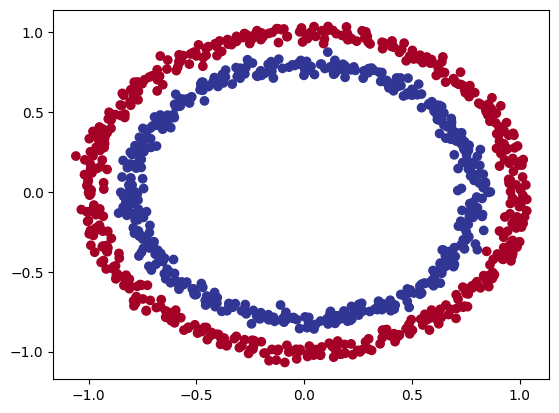

In [50]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=y,
            cmap=plt.cm.RdYlBu)

In [51]:
X.shape, y.shape

((1000, 2), (1000,))

In [52]:
import torch
from torch import nn

In [53]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [56]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [57]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModel().to(device)

In [58]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [59]:
 model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
 ).to(device)

In [60]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [61]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [62]:
with torch.inference_mode():
  initial_preds = model_0(X_test.to(device))
initial_preds.shape

torch.Size([200, 1])

Text(0.5, 1.0, 'prediction results with untrained data')

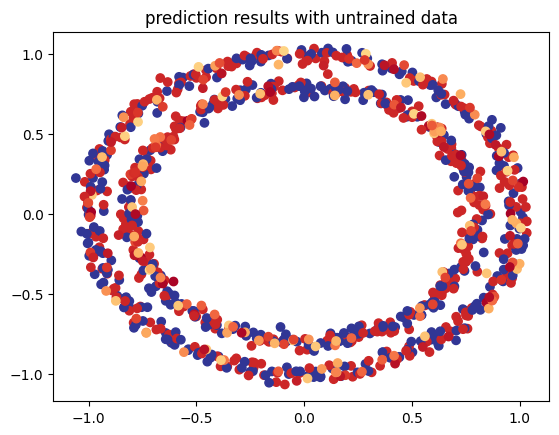

In [63]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=np.append(y_train,initial_preds.to("cpu").numpy()),
            cmap=plt.cm.RdYlBu)
plt.title("prediction results with untrained data")

In [64]:
#loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [65]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [66]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits.shape,y_logits[0:5,]

(torch.Size([200, 1]),
 tensor([[-0.0338],
         [-0.0309],
         [ 0.0894],
         [-0.0692],
         [ 0.2967]], device='cuda:0'))

In [67]:
y_prediction_probabilities = torch.sigmoid(y_logits)
y_prediction_probabilities[0:5,]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [68]:
y_predicted_lables = torch.round(y_prediction_probabilities)
y_predicted_lables[0:5,]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [69]:
X_train[:10,0]

tensor([ 0.6579,  0.6319, -1.0086, -0.9666, -0.1666, -0.8837, -0.3836,  0.6047,
        -0.5869,  0.8833])

In [70]:
y_logits[:10,]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

In [71]:
epochs = 1000
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  accuracy = accuracy_fn(y_true=y_train,
                         y_pred=y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                                 y_pred=test_pred)
    
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | Accuracy {accuracy:.2f}% | test_loss:{test_loss:.5f} | test_accuracy:{test_accuracy:.2f}%")

Epoch: 0 | Loss:0.69796 | Accuracy 51.88% | test_loss:0.69440 | test_accuracy:58.00%
Epoch: 100 | Loss:0.69331 | Accuracy 49.25% | test_loss:0.69271 | test_accuracy:53.00%
Epoch: 200 | Loss:0.69310 | Accuracy 50.88% | test_loss:0.69336 | test_accuracy:49.00%
Epoch: 300 | Loss:0.69304 | Accuracy 51.12% | test_loss:0.69376 | test_accuracy:46.50%
Epoch: 400 | Loss:0.69301 | Accuracy 51.25% | test_loss:0.69403 | test_accuracy:47.50%
Epoch: 500 | Loss:0.69299 | Accuracy 50.88% | test_loss:0.69423 | test_accuracy:47.00%
Epoch: 600 | Loss:0.69299 | Accuracy 51.25% | test_loss:0.69436 | test_accuracy:46.50%
Epoch: 700 | Loss:0.69298 | Accuracy 51.25% | test_loss:0.69446 | test_accuracy:46.00%
Epoch: 800 | Loss:0.69298 | Accuracy 51.50% | test_loss:0.69453 | test_accuracy:45.50%
Epoch: 900 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69458 | test_accuracy:45.00%


In [73]:
import requests
from pathlib import Path

import os
import zipfile

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [74]:
#!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

In [75]:
from helper_functions import plot_predictions, plot_decision_boundary

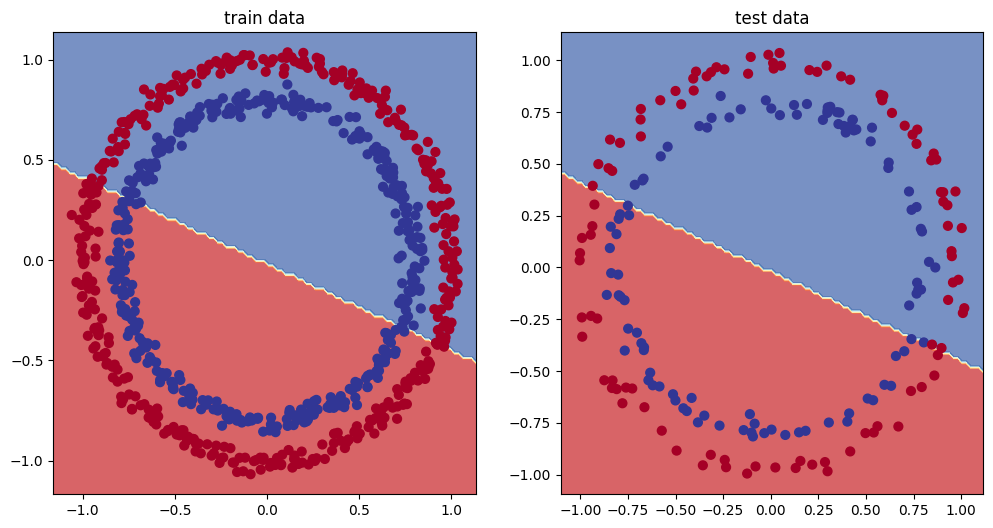

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_0,X_test,y_test)

In [77]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0796, -0.2678],
                      [ 0.4837, -0.4847],
                      [-0.3285, -0.1960],
                      [-0.4351,  0.0318],
                      [-0.6787,  0.6935]])),
             ('0.bias', tensor([-0.6069,  0.5210,  0.1150, -0.2191,  0.4239])),
             ('1.weight',
              tensor([[ 0.0331,  0.2036, -0.0446, -0.1426,  0.2221]])),
             ('1.bias', tensor([-0.2053]))])

In [81]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z
    


In [86]:
  model_1 = CircleModelV1().to(device)
  model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [83]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [85]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

 
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                                 y_pred=test_pred)
    
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | Accuracy {accuracy:.2f}% | test_loss:{test_loss:.5f} | test_accuracy:{test_accuracy:.2f}%")


Epoch: 0 | Loss:0.69396 | Accuracy 51.38% | test_loss:0.69261 | test_accuracy:51.00%
Epoch: 100 | Loss:0.69305 | Accuracy 51.38% | test_loss:0.69379 | test_accuracy:48.00%
Epoch: 200 | Loss:0.69299 | Accuracy 51.38% | test_loss:0.69437 | test_accuracy:46.00%
Epoch: 300 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69458 | test_accuracy:45.00%
Epoch: 400 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69465 | test_accuracy:46.00%
Epoch: 500 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69467 | test_accuracy:46.00%
Epoch: 600 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69468 | test_accuracy:46.00%
Epoch: 700 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69468 | test_accuracy:46.00%
Epoch: 800 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69468 | test_accuracy:46.00%
Epoch: 900 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69468 | test_accuracy:46.00%


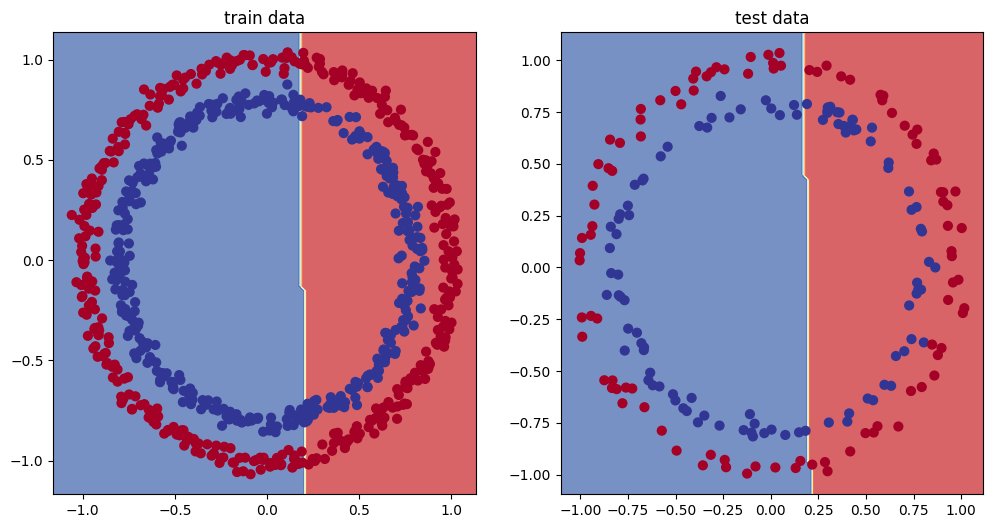

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_1,X_test,y_test)